In [2]:
import numpy as np 
import pandas as pd 
import os
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
import random
import matplotlib.pyplot as plt

In [53]:
#copy the original dataset
directory = "./PokemonData - aug"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorin

In [60]:
im_aug = transforms.Compose([
    transforms.Resize(120), #
    transforms.RandomVerticalFlip(), 
    transforms.RandomRotation(45), 
    transforms.RandomHorizontalFlip(), 
    transforms.RandomCrop(96),
    transforms.ColorJitter(brightness=0.2, contrast=0.2) 
])

In [77]:
#testing use
# newimgs=[]
# folder="./PokemonData/"+"Pikachu"
# imgnum=len(os.listdir(folder))
# for image in os.listdir(folder):
#     img_path= Path(folder+"/"+image)
#     im=Image.open(img_path)
#     for i in range(0,4):
#         new_img=im_aug(im)
#         newimgs.append(new_img)

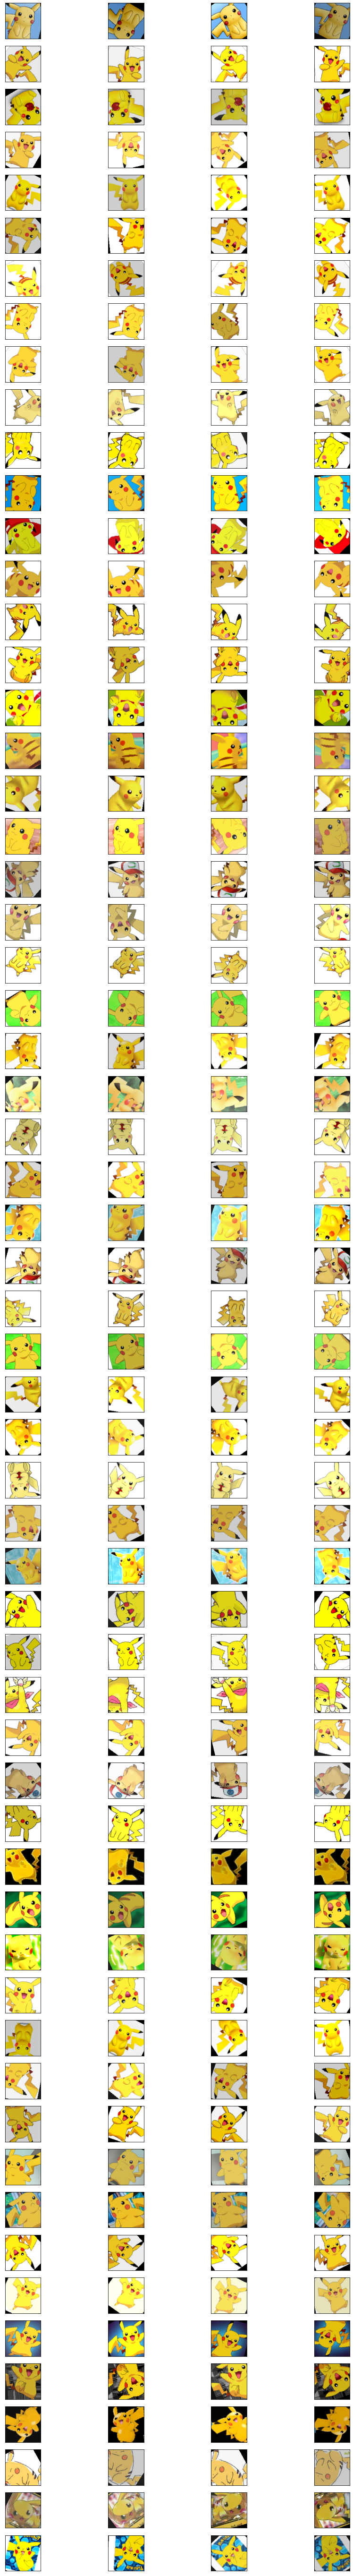

In [78]:
# nrows = imgnum
# ncols = 4
# figsize = (15, 100)
# _, figs = plt.subplots(nrows, ncols, figsize=figsize)
# for i in range(nrows):
#     for j in range(ncols):
#         figs[i][j].imshow(newimgs[4*i+j])
#         figs[i][j].axes.get_xaxis().set_visible(False)
#         figs[i][j].axes.get_yaxis().set_visible(False)
# plt.show()

In [ ]:
for label in labels:
    folder="./PokemonData - aug/"+label
    for image in os.listdir(folder):
        img_path= Path(folder+"/"+image)
        im=Image.open(img_path)
        for i in range(0,4):
            new_img=im_aug(im)
            new_img.save(folder+"/"+"a"+str(i)+"_"+image)